# 사회연결망분석 과제 2
- 강의노트에 있는 자료로도 충분하지만 해외 수업자료도 찾아보았습니다. 또한 제가 기존에 한 과제는 R로 하였기 때문에 다양한 경험을 해보고자 파이썬으로 작성한 코드를 찾으려 했고, github에 올라와 있는 해외 대학(University of WASHINGTON) 강의자료로 사용된 코드를 사용하였습니다.

코드 출처 :

https://gist.github.com/jmMAGALLANES/d5ef72f26a25bea9cf57

## Data Formats
* **Edges List**
* **Adjacency matrix**
* **Adjacency List**
* **Node List**

## Importing Data
### 엣지리스트 사용(Edges List)

- **데이터셋은 강의자의 깃헙에 올라와 있는 cosponsorshipEdges.csv 파일을 사용하였습니다.**
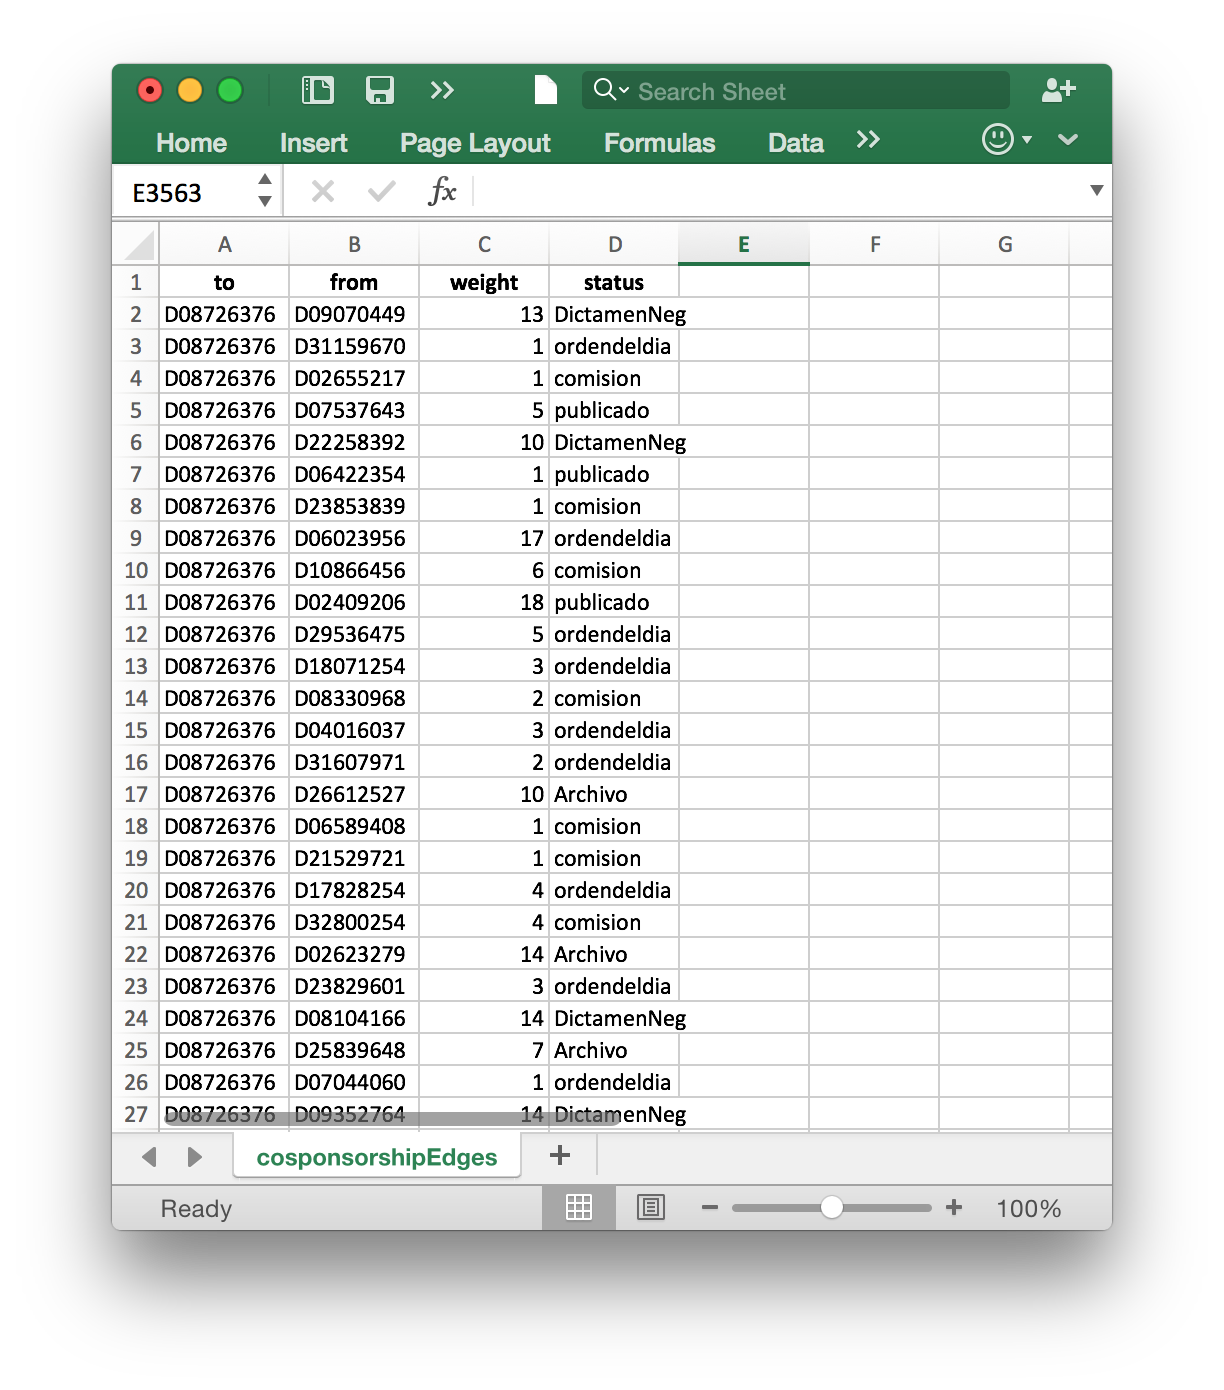

In [2]:
# 파일 위치 :
import pandas
fileEdges = 'cosponsorshipEdges.csv'

# CSV 파일 읽기, 이 데이터에 사용된 언어가 스페인어 인거 같아서 정확한 의미를 알 수는 없지만, 아무래도 책과 관련한 것 같다.
EdgesAsDF = pandas.read_csv(fileEdges)

print(EdgesAsDF.head(6))  # basic look
print(EdgesAsDF.shape)  # dimensions

          to       from  weight       status
0  D08726376  D09070449      13  DictamenNeg
1  D08726376  D31159670       1  ordendeldia
2  D08726376  D02655217       1     comision
3  D08726376  D07537643       5    publicado
4  D08726376  D22258392      10  DictamenNeg
5  D08726376  D06422354       1    publicado
(3562, 4)


In [3]:
# 연결망 생성하기
import networkx as net

In [5]:
# 현재 버전에서는 from_pandas_dataframe 이 것이 사용이 불가하기 때문에 edgelist를 사용하겠다.
G = net.from_pandas_edgelist(EdgesAsDF, 'to', "from", ["weight", "status"])

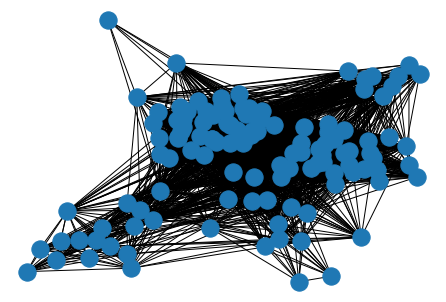

In [6]:
# Here you can visualize your import:

import matplotlib.pyplot as plot
%matplotlib inline
net.draw(G)

### 인접행렬(Adjacency Matrix) 사용하기
- row name, column name이 있는 데이터이다.
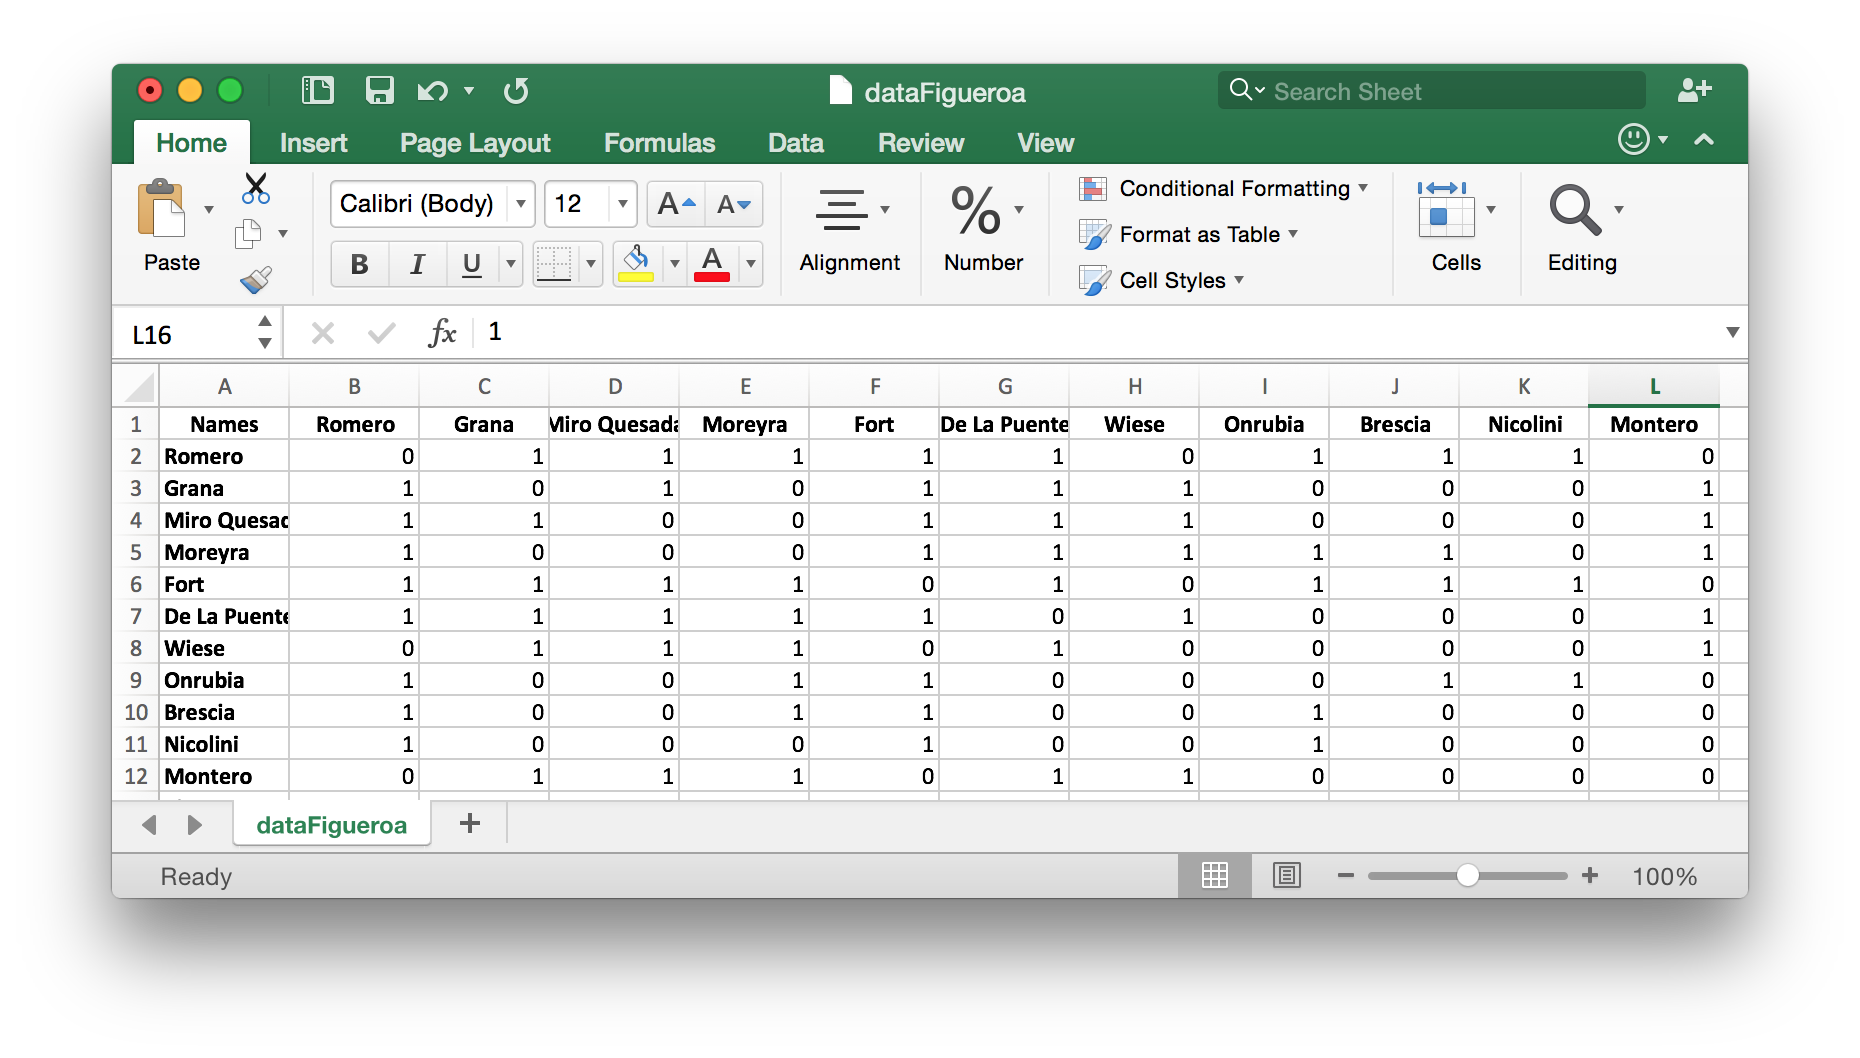

In [7]:
# Getting the matrix (edges):
EdgesAsDF = pandas.read_csv('dataFigueroa.csv', index_col=0)

print(EdgesAsDF.head(6))
print(EdgesAsDF.index) #row names

              Romero  Grana  Miro Quesada  Moreyra  Fort  De La Puente  Wiese  \
Names                                                                           
Romero             0      1             1        1     1             1      0   
Grana              1      0             1        0     1             1      1   
Miro Quesada       1      1             0        0     1             1      1   
Moreyra            1      0             0        0     1             1      1   
Fort               1      1             1        1     0             1      0   
De La Puente       1      1             1        1     1             0      1   

              Onrubia  Brescia  Nicolini  ...  Batievsky Spack  \
Names                                     ...                    
Romero              1        1         1  ...                0   
Grana               0        0         0  ...                0   
Miro Quesada        0        0         0  ...                0   
Moreyra             1

In [8]:
EdgesAsDF.columns # 어떤 종류의 열이 있는지 확인

Index(['Romero', 'Grana', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodriguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

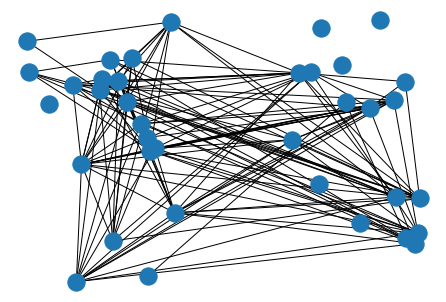

In [9]:
# The adjacency matrix needs not to include the last column in the data frame.
# 여기서 ix는 버전 업데이트에 따라 iloc으로 대체되었습니다.
adjacency=EdgesAsDF.iloc[:, 0:37]

#saving node labels
labels=list(adjacency)

# Network creation
NWfromMatrix = net.Graph(adjacency.values)

# Adding labels to nodes (relabelling):
NWfromMatrix = net.relabel_nodes(NWfromMatrix, dict(zip(range(37), labels)))
net.draw_random(NWfromMatrix)

### Adjacency List (인접리스트)
- 사용 파일 warsAdjlist.csv
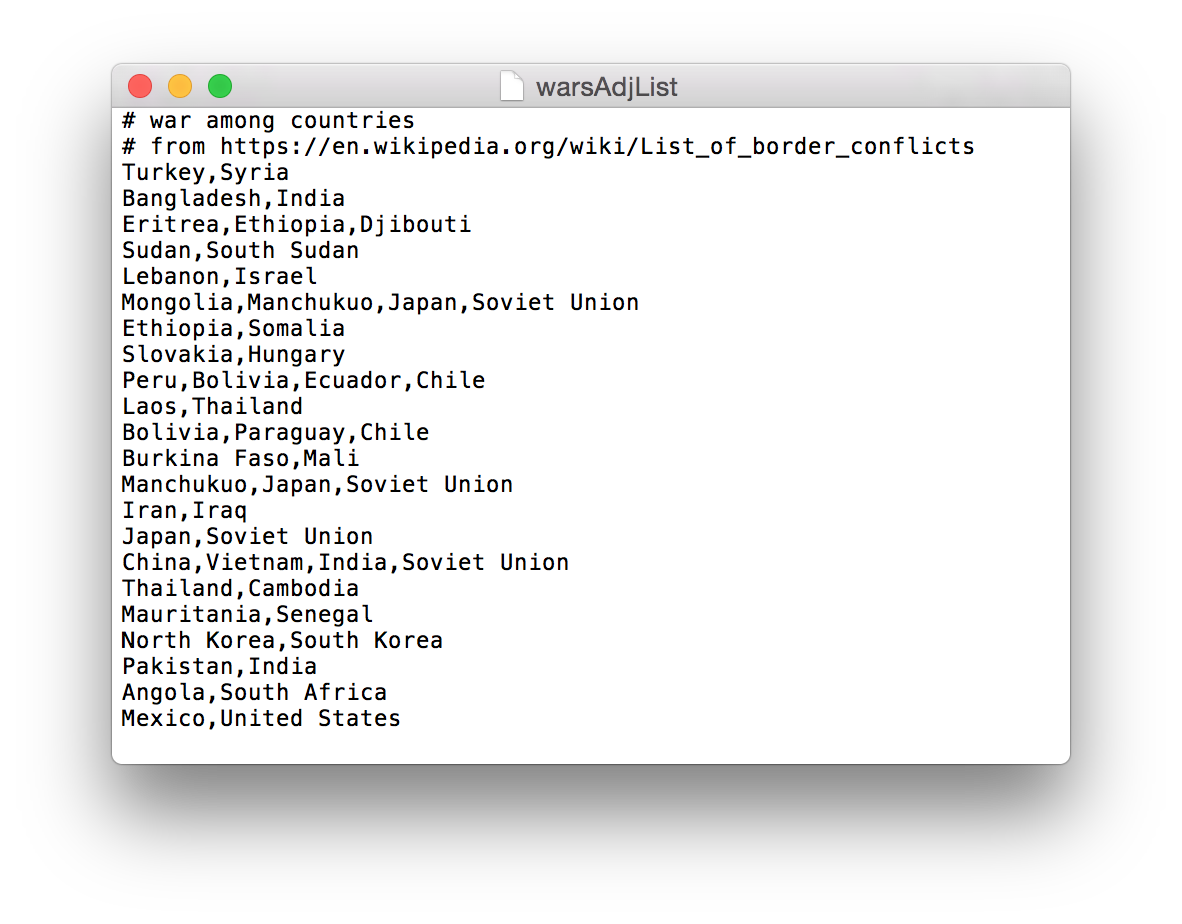

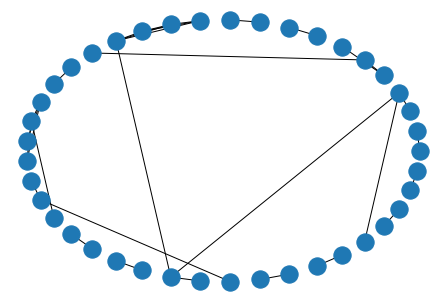

In [10]:
# import networkx as net

NWfromAdjList=net.read_adjlist("warsAdjlist.csv",delimiter=',') # no pandas this time.
net.draw_circular(NWfromAdjList)

### Node List (노드 리스트)
- 이번에는 위키피디이아에서 긁어온 것을 사용하도록 하겠다. 즉 크롤링한 데이터를 가지고 사용해 보겠다.
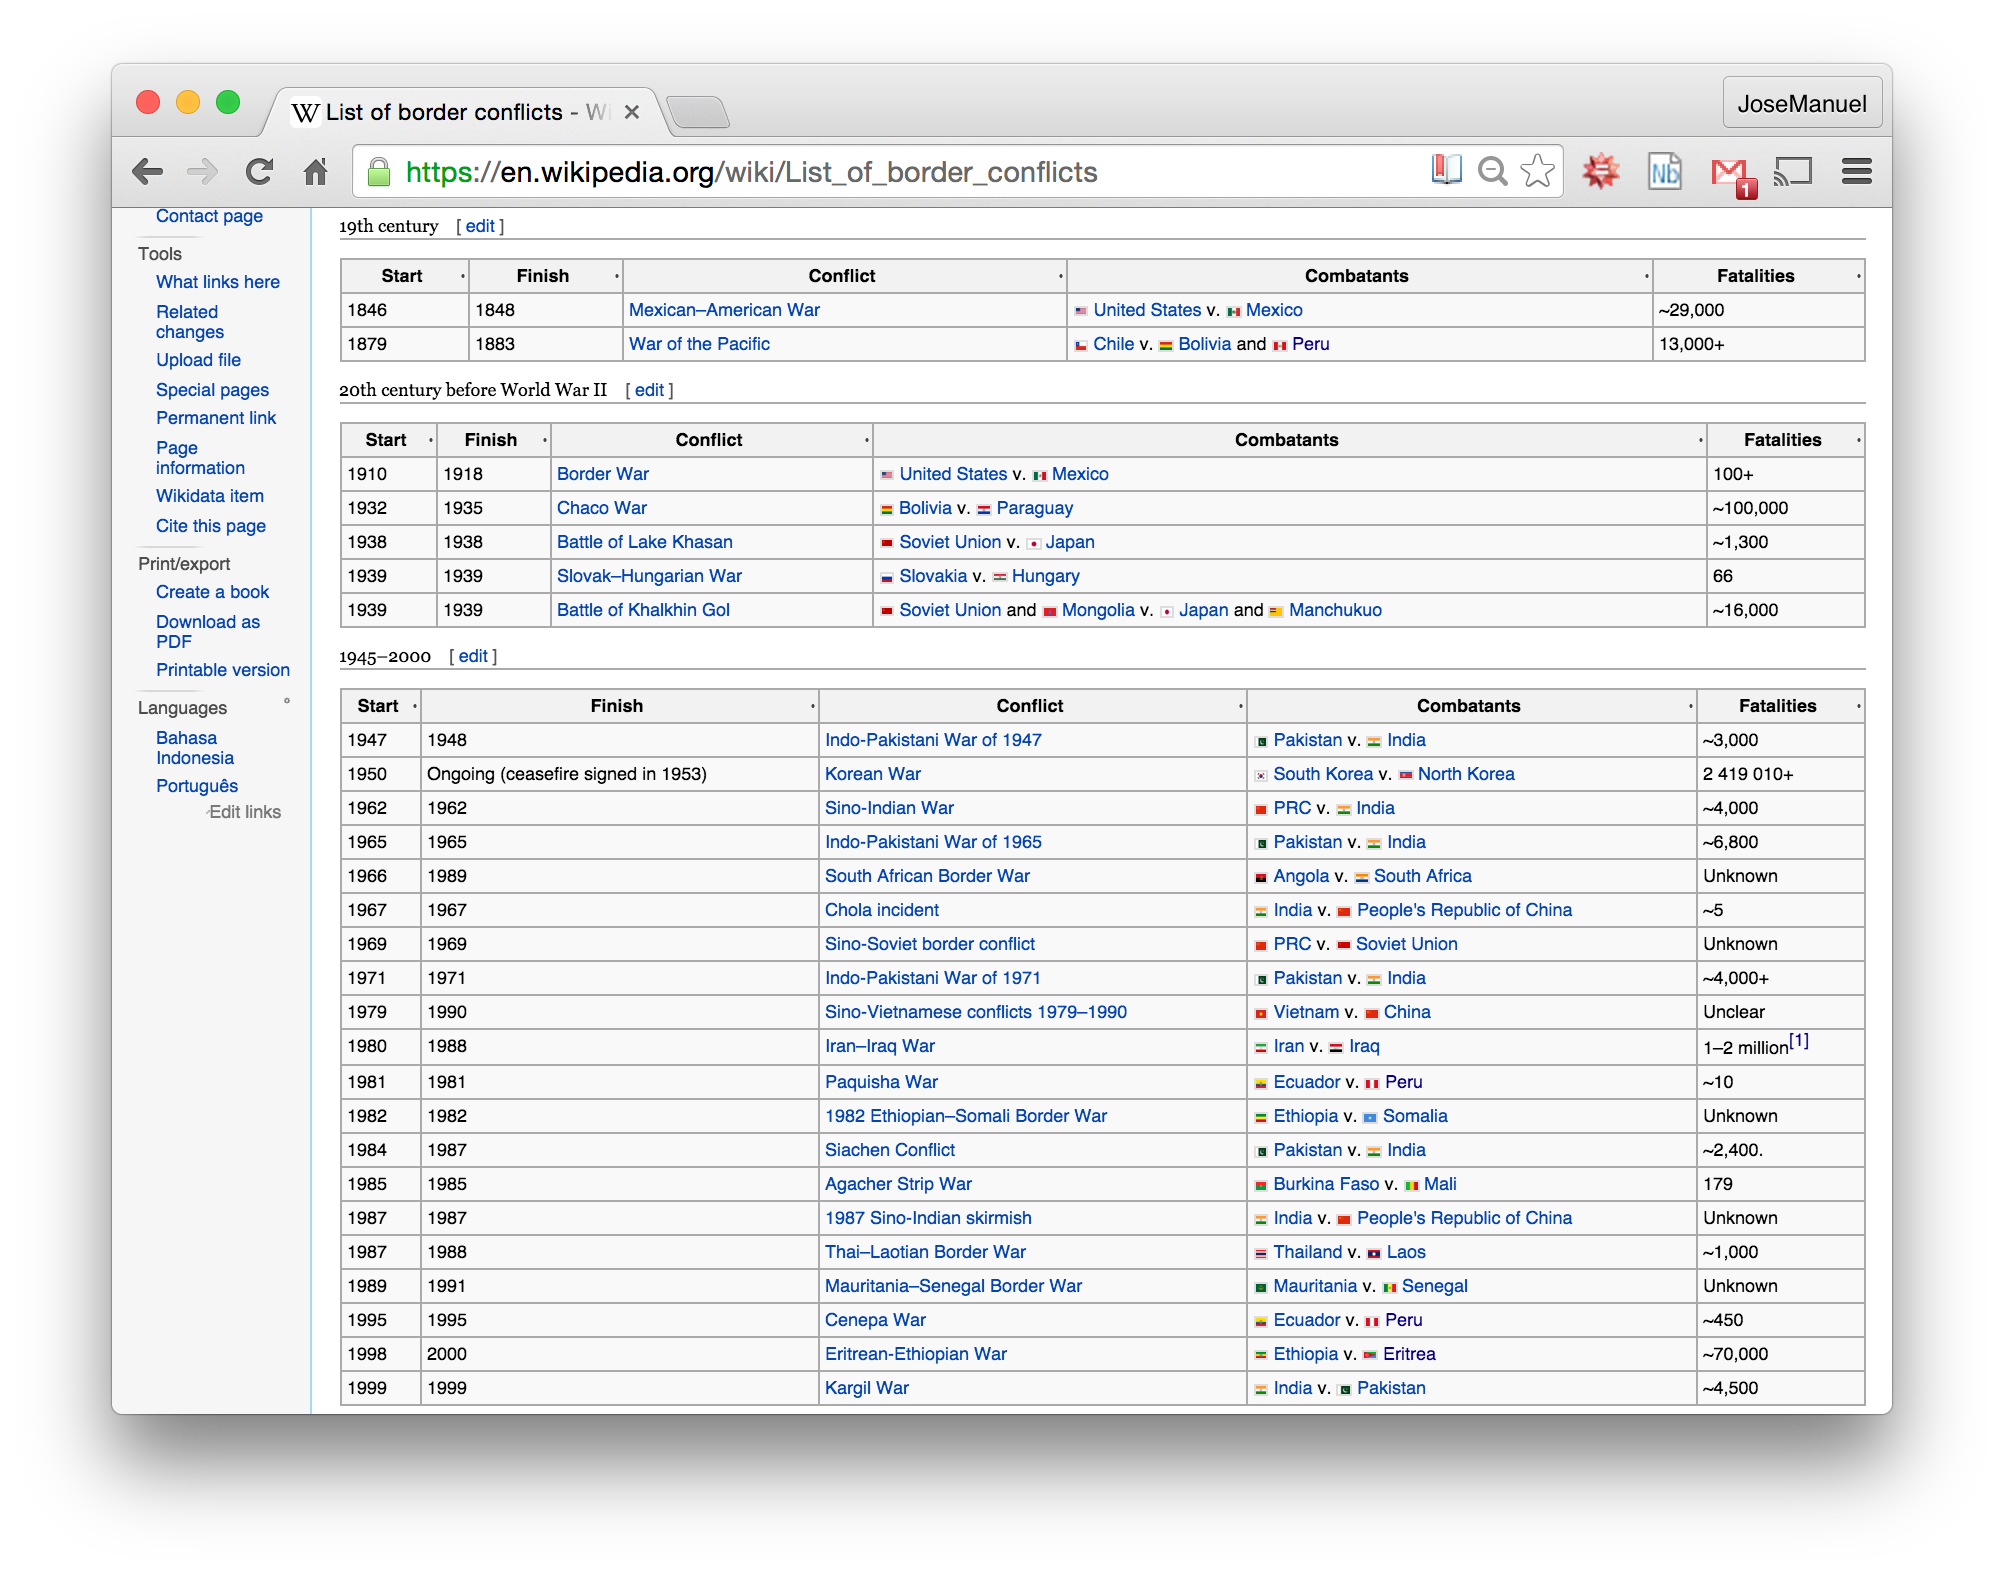

In [11]:
## Informing where the data is: 
# 이 데이터로 국가들 간의 전쟁들 관계를 볼 수 있습니다.
wikiLink='http://en.wikipedia.org/wiki/List_of_border_wars'
identification = { 'User-Agent' : 'Mozilla/5.0'} # Hiding who you are?

## Getting the html:
from requests import get
wikiPage = get(wikiLink, headers=identification)

## BS will interprete the html
from bs4 import BeautifulSoup as BS
wikiPage = BS(wikiPage.content,'html.parser')

## Let's get all the tables:
wikiTables = wikiPage.findAll('table', {'class': 'sortable wikitable'})

**NEED FOR CLEANING:**
From the previous image, you can see there are many field that will need cleaning:
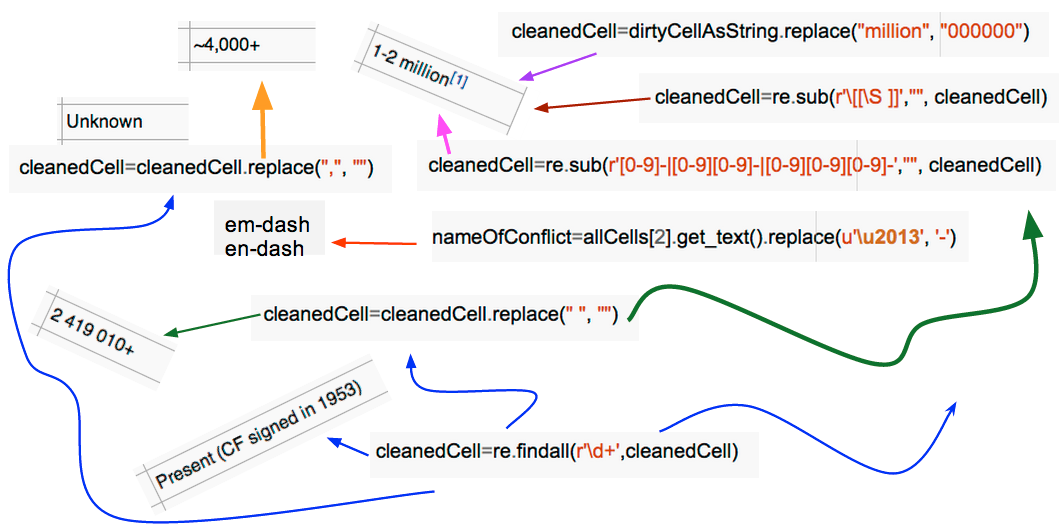

I have create a function (**clean_cell**) to do the cleaning:

In [12]:
# 파이썬에서 지원하는 정규표현식 모듈을 사용하여 전처리를 진행한다.
# 그리고 clean_cell이라는 함수를 만들어서 문자를 숫자로 바꾸거나 불필요한 띄어쓰기를 없앤다.
import re
def clean_cell(dirtyCellAsString):
    cleanedCell=dirtyCellAsString.replace("million", "000000")
    cleanedCell=cleanedCell.replace(" ", "")
    cleanedCell=cleanedCell.replace(",", "")
    cleanedCell=re.sub(r'[0-9]-|[0-9][0-9]-|[0-9][0-9][0-9]-',"", cleanedCell)
    cleanedCell=re.sub(r'\[[\S ]]',"", cleanedCell)
    cleanedCell=re.findall(r'\d+',cleanedCell)  
    return cleanedCell

In [13]:
# Ready to create the network.

# First create empty network, wich I will populate later:
countriesGraphFullClean=net.Graph()

#This will allow me to make edges when reading set of nodes:
from itertools import combinations

# Do this for each table
for eachTable in wikiTables: 
    # Get all the rows in the table
    allRows=eachTable.find_all("tr")
    # Do this for each row, BUT the first (the column names).
    for eachRow in range(1,len(allRows)):
        # Get all the cells
        allCells = allRows[eachRow].find_all("td")
            
        # Visit the possibly dirty cells, and clean them  that have unclean values and clen
        nameOfConflict=allCells[2].get_text().replace(u'\u2013', '-')            
        start=clean_cell(allCells[0].string)            
        end=clean_cell(allCells[1].string)                        
        fatalities=clean_cell(allCells[4].get_text())
        #end - cleaning
            
        #computing and exceptions
        try:
            duration=float(end[0]) - float(start[0])                
        except (ValueError,IndexError):
            duration=1
        try:
            fatalities=float(fatalities[0])
        except (ValueError,IndexError):
            fatalities=1
            
            
        # Getting the name of the countries in the current conflict in a list
        countries=[country.get_text() for country in allCells[3].find_all('a')]
        
        # Cleaning one case, and rebuilding the list
        countries=['China' if country=="PRC" or country=="People's Republic of China" else country for country in countries]
        
        # Getting the link to eah country webpage
        linksEachCountry=['http://en.wikipedia.org'+country.get('href') for country in allCells[3].find_all('a')] 
        
        # Preparing to save the coordinates of the country:
        coords=[]     
        
        # For every link collected 
        for link in linksEachCountry:
            # some cleaning:
            if link=='http://en.wikipedia.org/wiki/Soviet_Union':
                link='http://en.wikipedia.org/wiki/Russia'
            countryPage=BS(get(link).content,'html.parser')
            # get and unpack the coordinates
            lati,longi=countryPage.find_all("span",{'class': 'geo'})[0].string.split('; ')
            # adding the coordinates to list
            coords.append((float(lati),float(longi))) 

        # pair up countries with its coordinates:
        countryInfo=zip(countries,coords)            
            
        #populating graph
        for country,(lati,longi)in countryInfo:
            countriesGraphFullClean.add_node(country, latitude=lati,longitude=longi)
        for pair in combinations (countries,2):
            countriesGraphFullClean.add_edge(*pair,name=nameOfConflict,duration=duration,fatalities=fatalities)

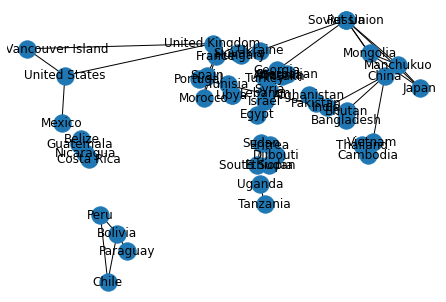

In [14]:
# Plotting the network  using the coordinates:

X=net.get_node_attributes(countriesGraphFullClean,'longitude')
Y=net.get_node_attributes(countriesGraphFullClean,'latitude')
posNet=dict((country,(X[country],Y[country])) for country in X if country in Y)
net.draw(countriesGraphFullClean,pos=posNet,with_labels=True)